In [1]:
#!pip install datasets

In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes")

### Dataset Summary
Movie Review Dataset: This dataset contains 5,331 positive and 5,331 negative processed sentences from Rotten Tomatoes movie reviews. This data was initially utilized in the research paper titled "Seeing stars: Exploiting class relationships for sentiment categorization with respect to rating scales" by Bo Pang and Lillian Lee, published in the Proceedings of the ACL in 2005.

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

#### This dataset is similar to a Python dictionary, where each key corresponds to a different split. We can use the usual dictionary syntax to access an individual split.

In [5]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [6]:
train_ds[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [7]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}


In [8]:
import pandas as pd

dataset.set_format(type="pandas")
df = dataset["train"][:]
df.head()

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [9]:
print(df.shape)
print(df.dtypes)

(8530, 2)
text     object
label     int64
dtype: object


#### In the `df` DataFrame, labels are represented as integers. We utilize the `int2str()` method to generate a new column in our DataFrame containing the corresponding label names.

In [10]:
def label_int2str(row):
    return dataset["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,the rock is destined to be the 21st century's ...,1,pos
1,"the gorgeously elaborate continuation of "" the...",1,pos
2,effective but too-tepid biopic,1,pos
3,if you sometimes like to go to the movies to h...,1,pos
4,"emerges as something rare , an issue movie tha...",1,pos


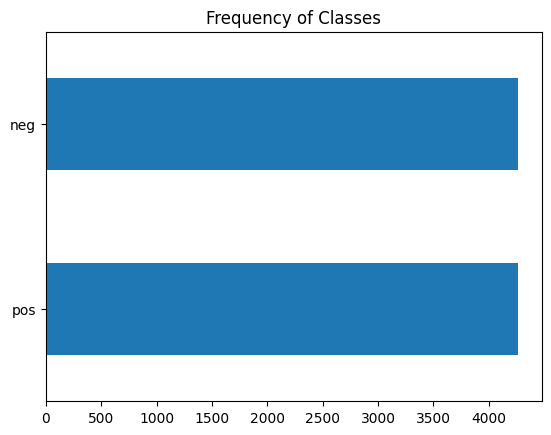

In [11]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

#### The dataset is balanced with 4265 positive and 4265 negative reviews.

In [12]:
# Check for label count
df["label"].value_counts()

1    4265
0    4265
Name: label, dtype: int64

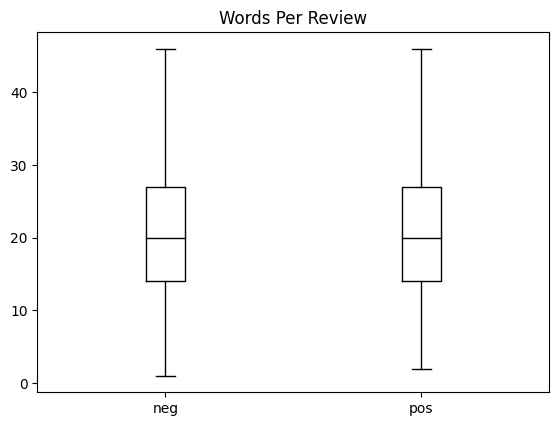

In [13]:
df["Words Per Review"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Review", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

#### Most reviews are approximately 20 words in length, with a similar word count distribution for both positive and negative reviews.

In [14]:
df.isnull().sum()

text                0
label               0
label_name          0
Words Per Review    0
dtype: int64

In [15]:
df.isna().sum()

text                0
label               0
label_name          0
Words Per Review    0
dtype: int64

#### There are no missing values.

In [16]:
# search for duplicates
df["text"].value_counts()

the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .                                     1
conforms itself with creating a game of 'who's who' . . . where the characters' moves are often more predictable than their consequences .                                                                            1
it's a film with an idea buried somewhere inside its fabric , but never clearly seen or felt .                                                                                                                        1
a horror movie with seriously dumb characters , which somewhat dilutes the pleasure of watching them stalked by creepy-crawly bug things that live only in the darkness .                                             1
pap invested in undergraduate doubling subtexts and ridiculous stabs at existentialism reminding of the discovery of the wizard of god i

#### There are no duplicates as the value count begins and concludes with a frequency of 1.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocessing(text):     
    # Tokenize the text using NLTK
    new_words = word_tokenize(text)
     
    # Remove stopwords using NLTK
    new_filtered_words = [word for word in new_words if word.lower() not in stopwords.words('english')]
     
    # Join the filtered words to form a clean text
    new_clean_text = ' '.join(new_filtered_words)
    return new_clean_text

text = df["text"][4]
print("Original Text:", text)
new_clean_text = preprocessing(text)
print("Text after Stopword Removal:", new_clean_text)

Original Text: emerges as something rare , an issue movie that's so honest and keenly observed that it doesn't feel like one .
Text after Stopword Removal: emerges something rare , issue movie 's honest keenly observed n't feel like one .


In [18]:
df["text"] = df["text"].apply(preprocessing)
df.head()

,text,label,label_name,Words Per Review
0,rock destined 21st century 's new `` conan `` ...,1,pos,34
1,gorgeously elaborate continuation `` lord ring...,1,pos,39
2,effective too-tepid biopic,1,pos,4
3,"sometimes like go movies fun , wasabi good pla...",1,pos,21
4,"emerges something rare , issue movie 's honest...",1,pos,21


In [25]:
tfidfV = TfidfVectorizer(stop_words = 'english')
vecTor=  tfidfV.fit_transform(df["text"])
print(vecTor.shape)

(8530, 16173)


In [26]:
print(vecTor[0])

  (0, 12078)	0.20542244227534653
  (0, 3807)	0.250375339742423
  (0, 86)	0.2551369562463637
  (0, 2237)	0.21500293084046376
  (0, 9587)	0.15184171838658697
  (0, 2842)	0.2676615156755108
  (0, 6171)	0.1767096674335419
  (0, 8673)	0.14332096092577665
  (0, 13430)	0.2551369562463637
  (0, 6300)	0.24625063991218146
  (0, 843)	0.22896446397909373
  (0, 12435)	0.2393578774678229
  (0, 7766)	0.2393578774678229
  (0, 2520)	0.28907239143884006
  (0, 15406)	0.2312536121273612
  (0, 3428)	0.27654783200969296
  (0, 13647)	0.2179470017044936
  (0, 12562)	0.28907239143884006


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV_1000 = TfidfVectorizer(max_features = 1000, stop_words = 'english')
vecTor_1000=  tfidfV_1000.fit_transform(df["text"])
# print(df.shape)
print(vecTor_1000.shape)

(8530, 1000)


In [24]:
print(vecTor_1000[0])

  (0, 718)	0.4474716137670591
  (0, 104)	0.46834078770650434
  (0, 574)	0.3307567469796541
  (0, 357)	0.3849265892221217
  (0, 509)	0.31219598482886696
  (0, 811)	0.47475385594763736
